# Heterogeneous Gammas - Gustavo Gerner Moherdaui

In [9]:
!pip install mystic

  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [27]:
#Libraries:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
import scipy
from scipy.optimize import fsolve
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint 
from scipy.optimize import NonlinearConstraint
import matplotlib.pyplot as plt
import math

In [28]:
#Parameters
N=5000 #Number of projects/agents
mu_x=1 #Expected return of factor associated with relationship banking
mu_z=1 #Expected return of the project 
sig_x=1 #Variance of factor associated with relationship banking
sig_z=1 #Variance of the project
gammas=np.linspace(0.38,0,N) #costs of each project, evenly spaced distribution

In [29]:
def gamma_bar(a,n):
    sig_x_h=a**2*sig_x
    sig_z_h=(1-a)**2*sig_z
    return((1/(n*np.sqrt(2*np.pi)))*(sig_z_h+n*sig_x_h)/np.sqrt(sig_z_h+sig_x_h))

$\underline{\gamma}$ (gamma_bar) refers to the cost where late investors are indifferent between obtaining the project information or not

# Formation of banks

Agents choose between entering a coallition/accepting a new member to the coallition that forms the bank.
In practice, we can just analyze the first agents with highest associated information costs and wheter it makes sence to accept the agent with highest information costs not in the coallition. If they accept him, the same process will occur to the next agent, if not, a bank is characterized. 


In [30]:
k=0 #auxiliary variables 
n=1
a0=0.5
banks=pd.DataFrame({"size":[],"min_gamma":[],"alpha":[],"bank":[]})

In [31]:
def objective(a):
        return -a
while n <N:

    def constraint_1(a):
        return -gamma_bar(a,n-k)+gammas[n-1]
    
    def constraint_2(a):
        return -gamma_bar(a,n-k+1)+gammas[n]
    
    sol_1 = minimize(objective, a0, constraints={'type': 'ineq', 'fun': constraint_1},bounds=[(0,1)],tol=10**(-8))
    alpha_1=sol_1.x
    
    sol_2 = minimize(objective, a0, constraints={'type': 'ineq', 'fun': constraint_2},bounds=[(0,1)],tol=10**(-8))
    alpha_2=sol_2.x
    
    if (alpha_1<=alpha_2) or (sol_1.success==False):
        a0=alpha_2
        n=n+1
    else:
        banks.loc[len(banks)] = [n-k,gammas[n-1],alpha_1[0],sol_1.success]
        k=n
        a0=alpha_2
        n=n+1
else:
    banks.loc[len(banks)] = [n-k,gammas[n-1],alpha_1[0],sol_1.success]

In [32]:
banks #bank==0 imply agents do not form a bank and are out of the market

,size,min_gamma,alpha,bank
0,4.0,0.379772,0.952537,1.0
1,4.0,0.379468,0.951794,1.0
2,4.0,0.379164,0.951051,1.0
3,4.0,0.378860,0.950308,1.0
4,4.0,0.378556,0.949566,1.0
...,...,...,...,...
218,65.0,0.021436,0.186196,1.0
219,66.0,0.016419,0.156612,1.0
220,68.0,0.011250,0.116842,1.0
221,71.0,0.005853,0.031772,1.0


We can see the model implies negative correlation between bank size and the lever of relationship banking ($\alpha$), as expected. Also, it implies there are more smaller banks than big ones, something I (for the moment) cannot explain why it occurs but goes well with data (unexpected result from the model)

Text(0.5, 0, 'Bank Size')

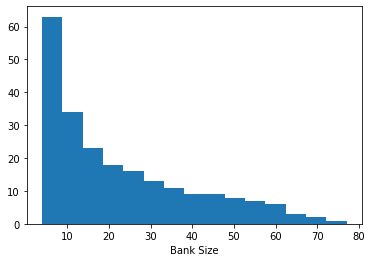

In [35]:
#Histogram showing bank size distributiom
plt.hist(banks["size"],bins=15)
plt.xlabel('Bank Size')

Text(0.5, 1.0, 'Banks')

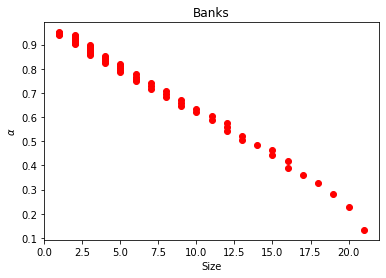

In [21]:
#Plot showing relation between $\alpha$ and bank size 
#(I recommend to use a lower N lever for visualisation, N=500 is a good option)
plt.plot(banks.loc[0:len(banks)-2,"size"], banks.loc[0:len(banks)-2,"alpha"],'o',color= "red")
plt.xlabel('Size')
plt.ylabel(r'$\alpha$')
plt.title("Banks")